<a href="https://colab.research.google.com/github/chirag1701/ENSO_waters_solubility/blob/main/ENSO_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torchvision


In [ ]:
!python -c "import torch; print(torch.__version__)"
!python -c "import torch; print(torch.version.cuda)"
!python --version
!nvidia-smi

2.3.1+cu121
12.1
Python 3.10.12
/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
#@title
# This code is for installing RDkit library that handles molecule data
import sys   # to interact with system python
import os    # to interact with system-level commands
import requests  # http requests
import subprocess  # Run external commands and processes
import shutil      # to perform high-level file operations
from logging import getLogger, StreamHandler, INFO

In [ ]:
logger = getLogger(__name__)  # __ __ for internal command
logger.addHandler(StreamHandler())
logger.setLevel(INFO)     # only log messages with a severity level of INFO or higher will be recorded

In [ ]:
!apt-get install -y libboost-all-dev
!apt-get install -y libeigen3-dev
!apt-get install -y python3-pyqt5
!apt-get install -y python3-venv
!apt-get install -y python3-pyqt5.qtopengl
!apt-get install -y python3-pyqt5.qtsvg
!apt-get install -y libsqlite3-dev

!pip install rdkit-pypi


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libboost-all-dev is already the newest version (1.74.0.3ubuntu7).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Suggested packages:
  libeigen3-doc libmpfrc++-dev
The following NEW packages will be installed:
  libeigen3-dev
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 1,056 kB of archives.
After this operation, 9,081 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libeigen3-dev all 3.4.0-2ubuntu2 [1,056 kB]
Fetched 1,056 kB in 1s (1,253 kB/s)
Selecting previously unselected package libeigen3-dev.
(Reading database ... 123594 files and directories currently installed.)
Preparing to unpack .../libeigen3-dev_3.4.0-2ubuntu2_all.deb ...
Unpacking libeigen3-dev (3.4.0-2ubuntu2) ...
Setting up libeig

In [ ]:
from rdkit import Chem


In [ ]:
!pip install torch torchvision torchaudio


  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [ ]:
!pip install torch_geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.2/64.2 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 18.9 MB/s eta 0:00:00


In [ ]:
import torch_geometric

In [ ]:
from torch_geometric.datasets import MoleculeNet   #importing MoleculeNet class from torch_geometric.datasets

In [ ]:
# Now we need to load the ESOL datset from MoleculeNet
dataset = MoleculeNet(root='.',name='ESOl')

Processing...
Done!


In [ ]:
dataset

ESOL(1128)

In [ ]:
# Now we will investigate the data to get an intuition on its underlying structure.
type(dataset)

torch_geometric.datasets.molecule_net.MoleculeNet

In [ ]:
dataset.num_features

9

In [ ]:
dataset.num_classes

/usr/local/lib/python3.10/dist-packages/torch_geometric/data/dataset.py:169: UserWarning: Found floating-point labels while calling `dataset.num_classes`. Returning the number of unique elements. Please make sure that this is expected before proceeding.
  warnings.warn("Found floating-point labels while calling "


734

In [ ]:
dataset.len()


1128

In [ ]:
dataset[0]

Data(x=[32, 9], edge_index=[2, 68], edge_attr=[68, 3], smiles='OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)C(O)C3O ', y=[1, 1])

In [ ]:
print(dataset[0].num_nodes)  #Sample nodes
print(dataset[0].num_edges)  #Sample edges

32
68


In [ ]:
# Investigating node features
dataset[0].x   # Node features of the first node

tensor([[8, 0, 2, 5, 1, 0, 4, 0, 0],
        [6, 0, 4, 5, 2, 0, 4, 0, 0],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [8, 0, 2, 5, 0, 0, 4, 0, 1],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [8, 0, 2, 5, 0, 0, 4, 0, 0],
        [6, 0, 4, 5, 2, 0, 4, 0, 0],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [8, 0, 2, 5, 0, 0, 4, 0, 1],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [8, 0, 2, 5, 0, 0, 4, 0, 0],
        [6, 0, 4, 5, 1, 0, 4, 0, 0],
        [6, 0, 2, 5, 0, 0, 2, 0, 0],
        [7, 0, 1, 5, 0, 0, 2, 0, 0],
        [6, 0, 3, 5, 0, 0, 3, 1, 1],
        [6, 0, 3, 5, 1, 0, 3, 1, 1],
        [6, 0, 3, 5, 1, 0, 3, 1, 1],
        [6, 0, 3, 5, 1, 0, 3, 1, 1],
        [6, 0, 3, 5, 1, 0, 3, 1, 1],
        [6, 0, 3, 5, 1, 0, 3, 1, 1],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [8, 0, 2, 5, 1, 0, 4, 0, 0],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [8, 0, 2, 5, 1, 0, 4, 0, 0],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [8, 0, 2, 5, 1, 0, 4, 0, 0],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
 

In [ ]:
dataset[0].edge_index.t()   # returns the edge index tensor of the first graph of deataset
# < shows the connectivity of edges  as a 2XN tensor , where N= no. of edges >

tensor([[ 0,  1],
        [ 1,  0],
        [ 1,  2],
        [ 2,  1],
        [ 2,  3],
        [ 2, 30],
        [ 3,  2],
        [ 3,  4],
        [ 4,  3],
        [ 4,  5],
        [ 4, 26],
        [ 5,  4],
        [ 5,  6],
        [ 6,  5],
        [ 6,  7],
        [ 7,  6],
        [ 7,  8],
        [ 7, 24],
        [ 8,  7],
        [ 8,  9],
        [ 9,  8],
        [ 9, 10],
        [ 9, 20],
        [10,  9],
        [10, 11],
        [11, 10],
        [11, 12],
        [11, 14],
        [12, 11],
        [12, 13],
        [13, 12],
        [14, 11],
        [14, 15],
        [14, 19],
        [15, 14],
        [15, 16],
        [16, 15],
        [16, 17],
        [17, 16],
        [17, 18],
        [18, 17],
        [18, 19],
        [19, 14],
        [19, 18],
        [20,  9],
        [20, 21],
        [20, 22],
        [21, 20],
        [22, 20],
        [22, 23],
        [22, 24],
        [23, 22],
        [24,  7],
        [24, 22],
        [24, 25],
        [2

In [ ]:
# graph level prediction label for the first graph
dataset[0].y

tensor([[-0.7700]])

In [ ]:
# Now we will convert SMILES to RDKIT molecules
dataset.smiles[0]   # or dataset[0]["smiles"]

'OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)C(O)C3O '

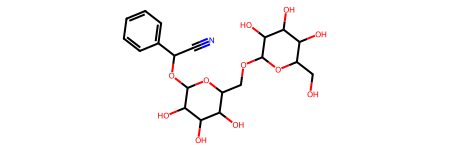

In [ ]:
# Rdkit is used for visualising molecules in their real shape
from rdkit.Chem.Draw import IPythonConsole
molecule = Chem.MolFromSmiles(dataset.smiles[0])  # converts the SMILES string in the dataset to Molecule
molecule

In [ ]:
type(molecule)

rdkit.Chem.rdchem.Mol

In [ ]:
# We will build a class that inherits from torch.nn.Module  ( with its in-built structure)
import torch
from torch.nn import Linear # for performing a linear transformation on the input data
# it is used in NN to project the input data to a new space governed by weights and biases
import torch.nn.functional as F # torch.nn.functional is a toolkit for nn's consisting of loss functions, activation functions ,etc
from torch_geometric.nn import GCNConv, TopKPooling, global_mean_pool
from torch_geometric.nn import global_mean_pool as gap, global_max_pool as gmp
embedding_size = 64

class GCN(torch.nn.Module):
  def __init__(self):   # constructor of the GCN class
  # Now we will call the contructor of the parent class torch.nn.module
    super(GCN, self).__init__()
    torch.manual_seed(42)

    #GCN layers
    self.initial_conv = GCNConv(dataset.num_features, embedding_size)  # first GCN layer which processes the input features
    self.conv1 = GCNConv(embedding_size, embedding_size) # input and output embedding size
    self.conv2 = GCNConv(embedding_size, embedding_size)
    self.conv3 = GCNConv(embedding_size, embedding_size)

    # output layer
    self.out = Linear(2*embedding_size, 1)  # gmp and gap are concatenated
  def forward(self, x, edge_index, batch_index): # x is the node features of your graph
    # first conv layer                           # edge_index = connection of edges
    hidden = self.initial_conv(x,edge_index )              # batch_index = which nodes belong to which graph
    hidden = F.tanh(hidden)
    # Other conv layers
    hidden = self.conv1(hidden, edge_index)
    hidden = F.tanh(hidden)
    hidden = self.conv2(hidden, edge_index)
    hidden = F.tanh(hidden)
    hidden = self.conv3(hidden, edge_index)
    hidden - F.tanh(hidden)
    # Global Pooling
    # stack different aggregations
    hidden = torch.cat([gmp(hidden,batch_index),gap(hidden,batch_index)], dim = 1)    # Returns batch-wise graph-level-outputs by taking the channel-wise
                                                                                      # maximum across the node dimension.
    # Apply a final linear classifier
    out = self.out(hidden)
    return out, hidden

model = GCN()
print(model)

GCN(
  (initial_conv): GCNConv(9, 64)
  (conv1): GCNConv(64, 64)
  (conv2): GCNConv(64, 64)
  (conv3): GCNConv(64, 64)
  (out): Linear(in_features=128, out_features=1, bias=True)
)


In [ ]:
print( "No. of parameters : {}".format(sum(p.numel() for p in model.parameters())))

No. of parameters : 13249


# **TRAINING**

In [ ]:
from torch_geometric.data import DataLoader
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Root mean squared error
mse = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.0007)

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [ ]:
model = model.to(device)

In [ ]:
# Wrap data in a loader
data_size = len(dataset)
num_graphs_per_batch = 64
loader = DataLoader(dataset[:int(data_size*0.8)], batch_size = num_graphs_per_batch, shuffle = True)
TestLoader = DataLoader(dataset[int(data_size*0.8):], batch_size = num_graphs_per_batch, shuffle = True)

In [ ]:
def train(dataset):
  for batch in loader:
    batch.to(device)
    optimizer.zero_grad()
    # passing the node features and connection info
    # forward pass
    pred, embedding = model(batch.x.float(), batch.edge_index, batch.batch)   # unpacking into 2 variables
    loss = mse(pred, batch.y)
    loss.backward()  # Calculates gradients
    optimizer.step()  # updates the parameters using the calculated gradients
  return loss,embedding

print("Starting training..")
losses = []
for epoch in range(2000):
  loss,h = train(dataset)   # h are the embeddings
  losses.append(loss)
  if epoch%100==0:
    print(f"Epoch {epoch} |   Train Loss {loss}")


Starting training..
Epoch 0 |   Train Loss 11.782380104064941
Epoch 100 |   Train Loss 1.2189022302627563
Epoch 200 |   Train Loss 0.7726762294769287
Epoch 300 |   Train Loss 0.23389089107513428
Epoch 400 |   Train Loss 0.37017831206321716
Epoch 500 |   Train Loss 0.7063078284263611
Epoch 600 |   Train Loss 0.42919978499412537
Epoch 700 |   Train Loss 0.09229110926389694
Epoch 800 |   Train Loss 0.1969119757413864
Epoch 900 |   Train Loss 0.22972732782363892
Epoch 1000 |   Train Loss 0.08087911456823349
Epoch 1100 |   Train Loss 0.1793895959854126
Epoch 1200 |   Train Loss 0.07451660931110382
Epoch 1300 |   Train Loss 0.06244745850563049
Epoch 1400 |   Train Loss 0.11192766577005386
Epoch 1500 |   Train Loss 0.04820442199707031
Epoch 1600 |   Train Loss 0.3353009521961212
Epoch 1700 |   Train Loss 0.02954839915037155
Epoch 1800 |   Train Loss 0.08598237484693527
Epoch 1900 |   Train Loss 0.03486781194806099


#**Visualising the training loss using seaborn**

In [ ]:
import seaborn as sns
losses_float = [float(loss.detach().numpy()) for loss in losses]

In [ ]:
loss_indices = list(range(1, len(losses_float) + 1))

<Axes: >

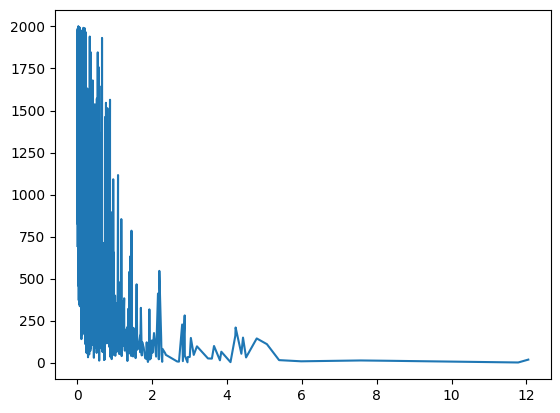

In [ ]:
plt = sns.lineplot(y = loss_indices, x =losses_float)   # lineplot accepts arguments as keyword
plt

# **Checking on test dataset**

In [ ]:
import pandas as pd
test_batch = next(iter(TestLoader))
test_batch.to(device)
with torch.no_grad():
  pred, embedding = model(test_batch.x.float(), test_batch.edge_index, test_batch.batch)
  df = pd.DataFrame()
  df['y_real'] = test_batch.y.tolist()
  df['y_pred'] = pred.tolist()
df['y_real']  = df['y_real'].apply(lambda row: row[0])
df['y_pred'] = df['y_pred'].apply(lambda row: row[0])
df


,y_real,y_pred
0,-2.570,-2.619900
1,-1.470,-1.158997
2,-5.410,-2.854333
3,0.610,-0.557823
4,-5.230,-4.329375
...,...,...
59,-1.920,-1.884398
60,-4.230,-3.574015
61,-4.554,-3.292221
62,-1.960,-1.730997


<Axes: xlabel='y_real', ylabel='y_pred'>

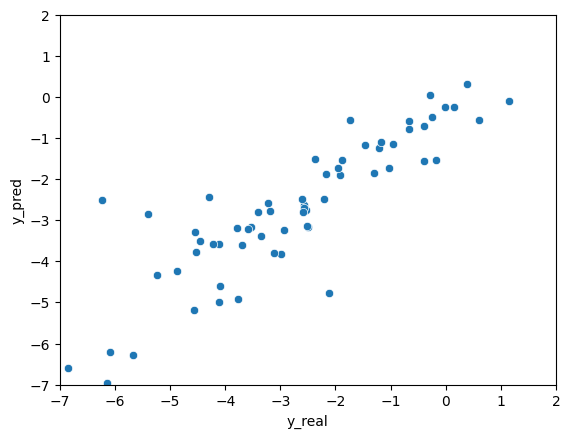

In [ ]:
plt = sns.scatterplot(data = df, x = 'y_real', y = 'y_pred')
plt.set(xlim = (-7,2), ylim = (-7,2))
plt

#**We have achieved decent performance on the prediction of water solubility values for the ESOL dataset**